## Model B

The diffusive dynamics of a conserved scalar order parameter $\phi$ is described by the following equation

$$
\dot{\phi}	+\boldsymbol{\nabla}\cdot\mathbf{J}=0.
$$
Here $\mathbf J$ is 
$$
\mathbf{J}	=-M\boldsymbol{\nabla}\mu+\sqrt{2DM}\boldsymbol{\Lambda},
\\
\mu=\frac{\delta\mathcal{F}}{\delta\phi}.
$$

while the free energy $\mathcal{F}$ is given as

$$
\mathcal{F}=\int\left(\frac{a}{2}\phi^{2}+\frac{b}{4}\phi^{4}+\frac{\kappa}{2}(\boldsymbol{\nabla}\phi)^{2}\right)d\boldsymbol{r}.
$$

Here $b>0$ and $\kappa >0$ for stability. The system will phase separate if $a<0$. This becomes clear from looking at the plot of the free energy, which we now plot. This model has been called the **model B** in Hohenberg and Halpering classification of critical phenomena (Rev. Mod. Phys. 49, 435, 1977). 

In [2]:
%matplotlib inline
import pygl, numpy as np
import scipy as sp
import matplotlib.pyplot as plt

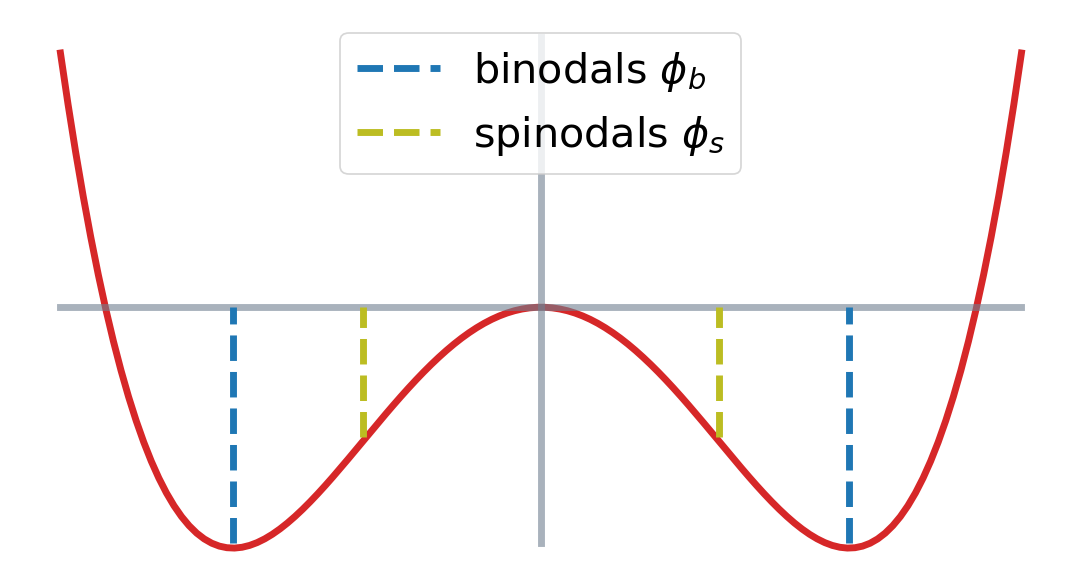

In [19]:
fig = plt.figure(num=None, figsize=(11, 6), dpi=124, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 24})

xx=1.56;  x = np.linspace(-xx,xx,128); y = -0.5*x*x + .25*x**4
y1 = np.linspace(-.245,0,128, );   y2 = np.linspace(-.245,.28,128, )

plt.plot(x, y, color='tab:red',lw=4)
plt.plot(x, y*0, color='slategray',lw=4, alpha=0.6); 
plt.plot(x*0, y2, color='slategray',lw=4, alpha=0.6)
plt.plot(0*x+1, y1, '--', color='tab:blue',lw=4, label=r'binodals $\phi_b$')
plt.plot(0*x-1, y1, '--', color='tab:blue',lw=4)

plt.plot(0*x+np.sqrt(1/3), y1*0.55, '--', color='tab:olive',lw=4, label=r'spinodals $\phi_s$')
plt.plot(0*x-np.sqrt(1/3), y1*0.55, '--', color='tab:olive',lw=4 )
plt.axis('off'); plt.legend(loc='upper center');

In the region between $\phi_s$ and $\phi_b$, the uniform state is metastable, while it unstable in the region $-\phi_s < \phi_0 <\phi_s$. In the unstable region, phase separation proceeds even in absence of noise. We study this region numerically below.

In [3]:
class modelB():
    '''
    Class to solve a model B
    '''
    def __init__(self, a, b, k, Laplacian):
        self.a = a
        self.b = b
        self.k =  k
        
        self.Laplacian = Laplacian

    
    
    def rhs(self, u):
        return self.Laplacian*(self.a*u + self.b*u*u*u - self.k*self.Laplacian*u)

       
    def integrate(self, u, T, dt):
        '''  solves the equation and plots it at differnt instants '''
        f = plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k');    
        N = int (np.size(u)**0.5)
        
        # now evolve the system in time using Euler
        for i in range(int(T)):          
            u = u + dt*self.rhs(u)
            
            if (i==0):               self.configPlot(u, f, 1, i);
            elif (i==int(T/4)):      self.configPlot(u, f, 2, i);
            elif (i==int(T/2)):      self.configPlot(u, f, 3, i);
            elif (i==T-1):           self.configPlot(u, f, 4, i);
        plt.show() 
    
    
    def configPlot(self, u, f, n_, i):
        U= u.reshape((N,N)); sp =  f.add_subplot(1, 4, n_ )  
       
        plt.pcolormesh(U, cmap=plt.cm.RdBu_r); plt.colorbar(orientation='horizontal');
        
        plt.axis('off'); plt.title('T = %1.2E'%(i))
    

In [4]:
# construct the laplacian using PyGL
N, h, st = 32, 1, 5

fd  = pygl.dms.FD(N, st, h)
D22 = fd.diffmat(2); I=sp.sparse.identity(N)

Laplacian = sp.sparse.kron(D22, I) + sp.sparse.kron(I, D22)
Laplacian =  Laplacian.tocsr()

In [5]:
a, b, k   = -.25, .25, 1
rm = modelB(a, b, k, Laplacian)   # instantiate the class

### Simulate the conserved dynamics for a given initial density $\phi_0$

The domain remain bicontinuous for $\phi_0 <0.4$, while droplets are formed otherwise.

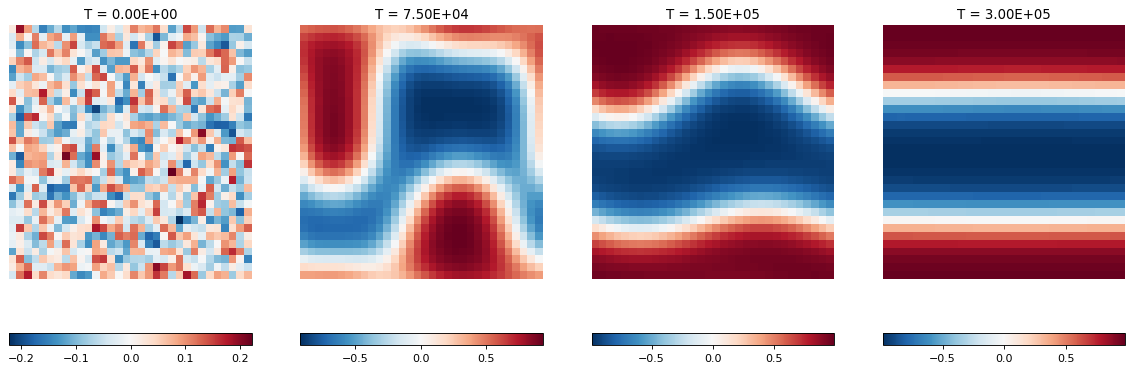

In [9]:
u0 = 0.0
u  = u0 + 0.2*(1-2*np.random.random(N*N))


# Integrate and plot the data
T, dt  = 3e5, 0.01
rm.integrate(u, T, dt)

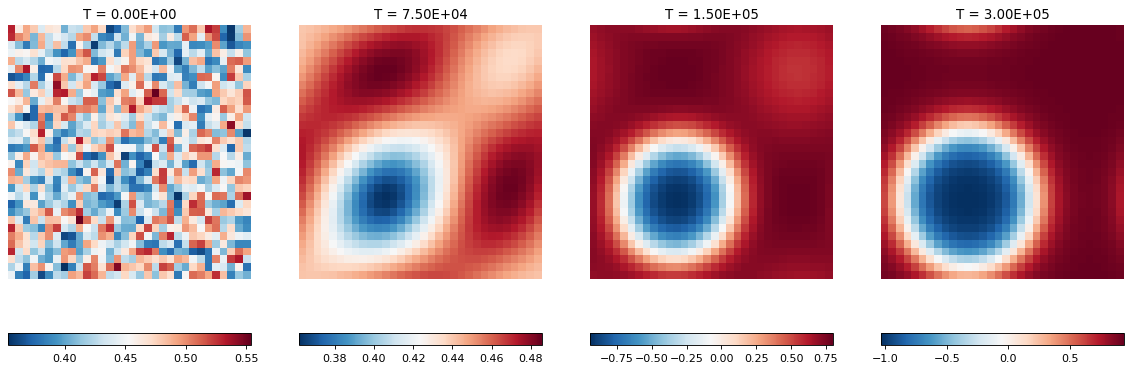

In [7]:
# Simulate the conserved dynamics for a given initial density \phi
u0 = 0.45
u  = u0 + 0.1*(1-2*np.random.random(N*N))


# Integrate and plot the data
T, dt  = 3e5, 0.01
rm.integrate(u, T, dt)